# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [3]:
hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013


In [5]:
def readmit(row):
    if row['Excess Readmission Ratio'] < .95 :
        return 'less than .95'
    if row['Excess Readmission Ratio'] > 1.05 :
        return 'greater than 1.05'
    else:
        return '0.95 to 1.05'
    
def discharge(row):
    if row['Number of Discharges'] < 300 :
        return 'less than 300'
    if row['Number of Discharges'] > 1000 :
        return 'greater than 1000'
    else:
        return '300 to 1000'
    
clean_hospital_read_df['readmit_ratio'] = clean_hospital_read_df.apply (lambda row: readmit(row),axis=1)
clean_hospital_read_df['num_discharge_group'] = clean_hospital_read_df.apply(lambda row: discharge(row),axis=1)
clean_hospital_read_df.tail(3).transpose()
 

,1892,13615,13666
Hospital Name,FLORIDA HOSPITAL,NEW ENGLAND BAPTIST HOSPITAL,HOSPITAL FOR SPECIAL SURGERY
Provider Number,100007,220088,330270
State,FL,MA,NY
Measure Name,READM-30-HF-HRRP,READM-30-HIP-KNEE-HRRP,READM-30-HIP-KNEE-HRRP
Number of Discharges,3570,3980,6793
Footnote,NaN,NaN,NaN
Excess Readmission Ratio,1.0896,0.7682,0.7379
Predicted Readmission Rate,24.5,3.7,3.9
Expected Readmission Rate,22.5,4.8,5.3
Number of Readmissions,879,142,258


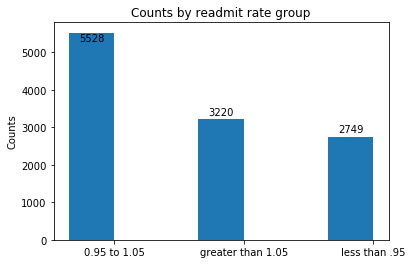

In [6]:
counts = clean_hospital_read_df.readmit_ratio.value_counts()
countslist = list(counts)
countsindex = list(counts.index)

N = len(countslist)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, countslist, width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Counts by readmit rate group')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(countsindex)

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1, ax)

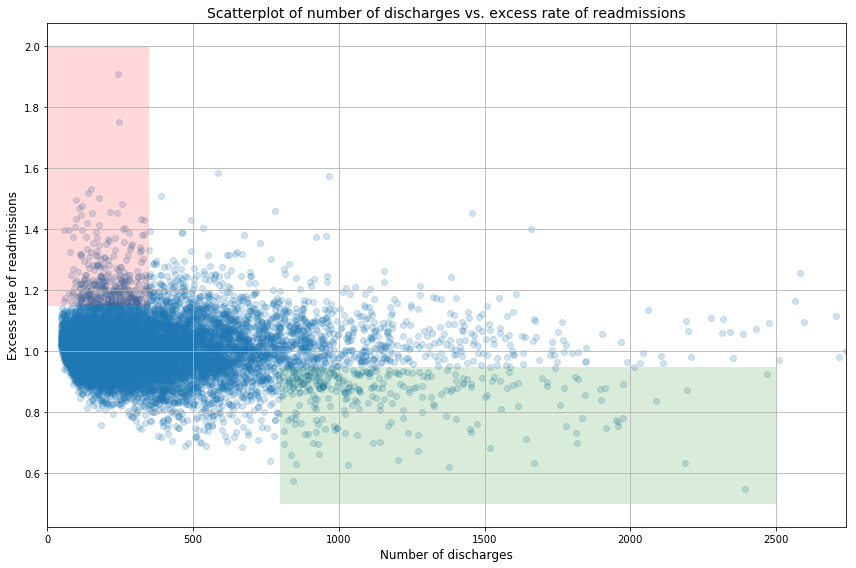

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

#### A. Do you agree with the above analysis and recommendations? Why or why not?

First, saying that the rate of admissions is trending down is incorrect, because trending implies change over time. This is a collection of data points showing the relationship between number of admissions and readmission rate. There does appear to be a slight negative correlation of readmission rate, however. Second, the statements made in A2 and A3 appear to be true in that the red shaded area appears to contain more points than the area to the right of it, and the green shaded area appears to contain fewer points than the area to the left of it. What isn't clear is whether there is any significance to this, as both of these should be expected as there will be fewer hospitals with larger admission rates than ones with fewer admissions. No testing was shown to support this.

In [8]:
a = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<100,'Excess Readmission Ratio'].mean()
a = round(a,3); a

1.023

In [9]:
b = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>1000,'Excess Readmission Ratio'].mean()
b = round(b,3); b

0.978

In [10]:
print('Readmission ratio for hospitals with less than 100 discharges is ' + str(a) + ' and for greater than 1000 discharges is ' + str(b))

Readmission ratio for hospitals with less than 100 discharges is 1.023 and for greater than 1000 discharges is 0.978


In [11]:
c = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].dropna(); c
c.corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


Preliminary conclusion states a significant correlation between number of discharges and readmission rates. The correlation is -.097, but does not prove that 9.7% is significant.

In [12]:
d = clean_hospital_read_df['Number of Discharges'].value_counts().sort_index()

(array([ 134.,  135.,  136.,  135.,  135.,  131.,  126.,   89.,   73.,
          44.,   45.,   35.,   21.,   15.,   10.,    6.,    6.,    5.,
           6.,    2.,    1.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([   25.  ,   160.36,   295.72,   431.08,   566.44,   701.8 ,
          837.16,   972.52,  1107.88,  1243.24,  1378.6 ,  1513.96,
         1649.32,  1784.68,  1920.04,  2055.4 ,  2190.76,  2326.12,
         2461.48,  2596.84,  2732.2 ,  2867.56,  3002.92,  3138.28,
         3273.64,  3409.  ,  3544.36,  3679.72,  3815.08,  3950.44,
         4085.8 ,  4221.16,  4356.52,  4491.88,  4627.24,  4762.6 ,
         4897.96,  5033.32,  5168.68,  5304.04,  5439.4 ,  5574.76,
         5710.12,  5845.48,  5980.84,  6116.2 ,  6251.56,  6386.92,
         6522.28,  6657.64,  6793.  ]),
 <a list of 50 P

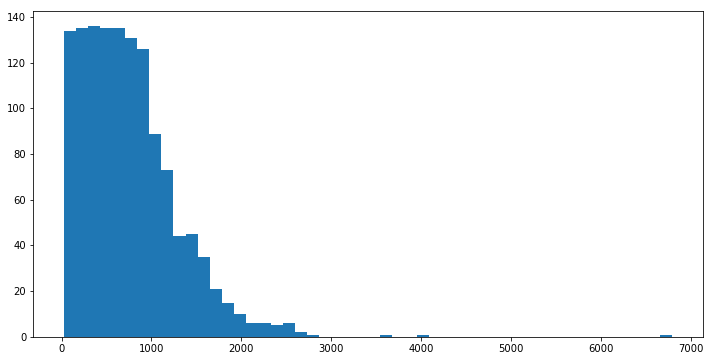

In [13]:
plt.figure(figsize = (12,6))
plt.hist(d.index,50)

#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
* Setup an appropriate hypothesis test.

Null hypothesis, H0, states that the mean readmission ratio is equal for small ( less than 100 discharges) hospitals and large ( greater than 1000 discharges).
The alternate hypothesis is that these numbers are not equal.

* Compute and report the observed significance value (or p-value).

In [14]:
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]; small

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,readmit_ratio,num_discharge_group
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,greater than 1.05,less than 300
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,greater than 1.05,less than 300
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,greater than 1.05,less than 300
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013,greater than 1.05,less than 300
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013,greater than 1.05,less than 300
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013,greater than 1.05,less than 300
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013,greater than 1.05,less than 300
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013,greater than 1.05,less than 300
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013,greater than 1.05,less than 300
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013,greater than 1.05,less than 300


In [15]:
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]; large

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,readmit_ratio,num_discharge_group
11757,FLETCHER ALLEN HOSPITAL OF VERMONT,470003,VT,READM-30-AMI-HRRP,1002,NaN,0.9192,14.0,15.2,136.0,07/01/2010,06/30/2013,less than .95,greater than 1000
821,CRITTENTON HOSPITAL MEDICAL CENTER,230254,MI,READM-30-HIP-KNEE-HRRP,1004,NaN,1.1405,6.1,5.4,64.0,07/01/2010,06/30/2013,greater than 1.05,greater than 1000
2363,YUMA REGIONAL MEDICAL CENTER,30013,AZ,READM-30-PN-HRRP,1007,NaN,1.0760,18.5,17.2,191.0,07/01/2010,06/30/2013,greater than 1.05,greater than 1000
7188,EVANSTON HOSPITAL,140010,IL,READM-30-COPD-HRRP,1007,NaN,0.9930,20.0,20.2,201.0,07/01/2010,06/30/2013,0.95 to 1.05,greater than 1000
7473,NORTH KANSAS CITY HOSPITAL,260096,MO,READM-30-HF-HRRP,1008,NaN,0.9890,21.5,21.7,216.0,07/01/2010,06/30/2013,0.95 to 1.05,greater than 1000
2341,KING'S DAUGHTERS' MEDICAL CENTER,180009,KY,READM-30-PN-HRRP,1008,NaN,1.0765,21.0,19.5,216.0,07/01/2010,06/30/2013,greater than 1.05,greater than 1000
12428,NORTH KANSAS CITY HOSPITAL,260096,MO,READM-30-HIP-KNEE-HRRP,1010,NaN,0.8992,4.5,5.1,44.0,07/01/2010,06/30/2013,less than .95,greater than 1000
359,UNIVERITY OF MD BALTO WASHINGTON MEDICAL CENTER,210043,MD,READM-30-PN-HRRP,1014,NaN,1.1941,21.7,18.2,231.0,07/01/2010,06/30/2013,greater than 1.05,greater than 1000
12862,CENTRAL DUPAGE HOSPITAL,140242,IL,READM-30-HF-HRRP,1014,NaN,0.8781,19.0,21.6,185.0,07/01/2010,06/30/2013,less than .95,greater than 1000
12181,"MEMORIAL HEALTHCARE SYSTEM, INC",440091,TN,READM-30-COPD-HRRP,1015,NaN,0.9076,17.5,19.3,171.0,07/01/2010,06/30/2013,less than .95,greater than 1000


In [16]:
import scipy.stats as stats
stats.ttest_ind(small['Excess Readmission Ratio'],large['Excess Readmission Ratio'],equal_var=False)

Ttest_indResult(statistic=7.6017424185004856, pvalue=1.2752435451140344e-13)

* Report statistical significance for  α  = .01.

The p-value comparing the Excess Readmission Ratios for large and small hospitals is 1.27e-13. So definitely small enough to reject the null hypothesis.

* Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In this scenario, the results are statistically significant (i.e. the sample size is large enough and the p-value is well under the typical .05 threshold). The appear to be practically significant less because of the difference between the excess readmission ratios (1.023-.978=0.045), but in that one is positive and one is negative, and the desire is to have a negative number here. Despite both numbers being near 0, from a purely black and white stance, the negative number is good and the positive number is bad.

* Look at the scatterplot above.
  * What are the advantages and disadvantages of using this plot to convey information?
  * Construct another plot that conveys the same information in a more direct manner.

The main disadvantage to using the plot above to convey the effect of readmission ratio is that it is not broken down to enough detail. This should be separated into separate charts for small, medium, and large hospitals by number of discharges, and then for each of those groupings, individual analysis needs to be completed for the ratios grouped by measure name. Also, looking at hospitals with less than 100 discharges may be insufficient, as there may be correlations not seen here between hospital size and the number of each procedure (measure name), which could be different for large and small hospitals.

In [17]:
mn = clean_hospital_read_df['Measure Name'].value_counts().reset_index()
mn.rename(columns={'index': 'measure_name', 'Measure Name': 'measure_count'}, inplace=True)
mn

,measure_name,measure_count
0,READM-30-HF-HRRP,2833
1,READM-30-PN-HRRP,2789
2,READM-30-COPD-HRRP,2727
3,READM-30-AMI-HRRP,1777
4,READM-30-HIP-KNEE-HRRP,1371


In [18]:
mn = (mn.measure_name.tolist())
mn

['READM-30-HF-HRRP',
 'READM-30-PN-HRRP',
 'READM-30-COPD-HRRP',
 'READM-30-AMI-HRRP',
 'READM-30-HIP-KNEE-HRRP']

In [19]:
# Calculate the actual rate of readmissions:  num_readmits/num_discharges
clean_hospital_read_df['actual_readmit_rate'] = (clean_hospital_read_df['Number of Readmissions'] 
                                                    /clean_hospital_read_df['Number of Discharges']*100)

C:\Users\conee\Anaconda3\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


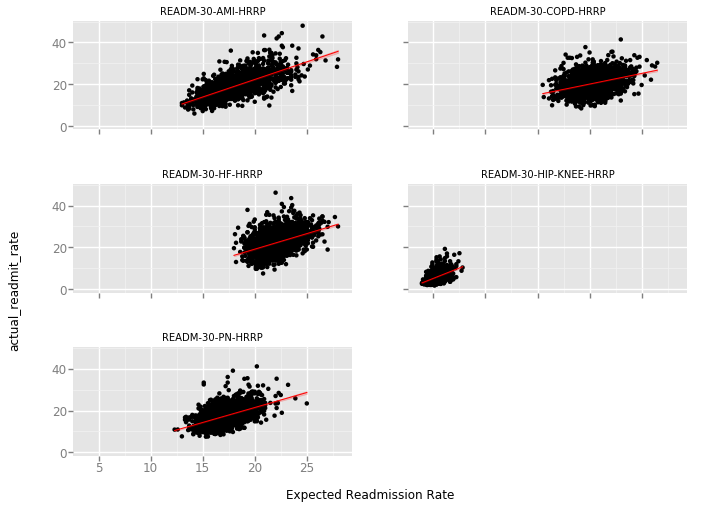

<ggplot: (-9223371851516326866)>

In [20]:
from ggplot import *
ggplot(aes(x='Expected Readmission Rate',y='actual_readmit_rate'), data=clean_hospital_read_df) +\
    geom_point() +\
    theme_gray() +\
    facet_wrap('Measure Name') +\
    stat_smooth(method='lm', color='red')

C:\Users\conee\Anaconda3\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


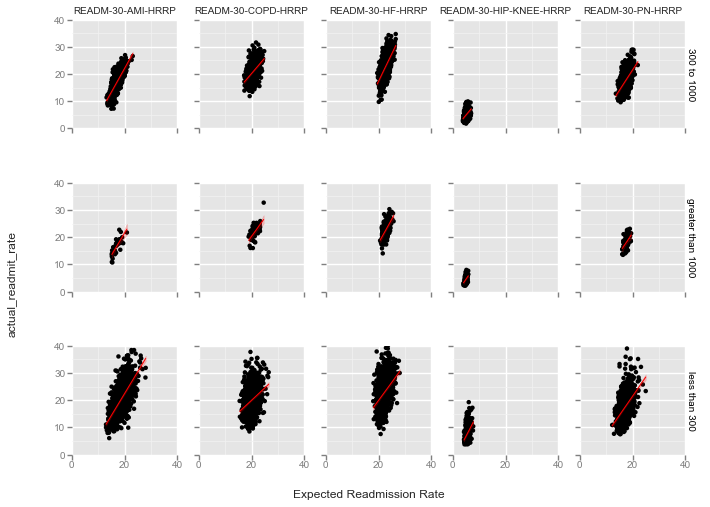

<ggplot: (-9223371851512351246)>

In [21]:
ggplot(aes(x='Expected Readmission Rate',y='actual_readmit_rate'), data=clean_hospital_read_df) +\
    geom_point() +\
    facet_grid('num_discharge_group','Measure Name') +\
    stat_smooth(method='lm', color='red') +\
    xlim(0,40) +\
    ylim(0,40)